## Assignment 5 

#1.1 Defining Libraries

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


#1.2 Polygon Function

In [2]:


def polygon(n, r):
   
    angles= np.linspace(0 * np.pi, 2 * np.pi, n + 1)
    pps = int((1680 +n) / n) #points per side
    xc = r * np.cos(angles)[0:n]
    yc = r * np.sin(angles)[0:n]
    xpolygonpoint = [xc[-1]]
    ypolygonpoint = [yc[-1]]
    for i in range(-1, len(xc) - 1):
        tolerance = 0.01
        if abs(xc[i+1] - xc[i]) < tolerance:
            xno = np.ones(pps - 2) * xc[i]
            yno = np.linspace(yc[i], yc[i + 1], pps)[1:-1]  
        else:
            m = ( yc[i + 1] - yc[i]) / ( xc[i + 1] -xc[i] )
            c = yc[i] - m * xc[i]
            xno = np.linspace(xc[i ], xc[i + 1], pps)
            xno = np.delete(xno, [0, -1])
            yno = (xno * m) + c
        xpolygonpoint+= list(xno)
        ypolygonpoint+= list(yno)
        xpolygonpoint.append(xc[i + 1])
        ypolygonpoint.append(yc[i + 1])
    xpolygonpoint.pop()
    ypolygonpoint.pop()
    return np.array(xpolygonpoint), np.array(ypolygonpoint)


This function polygon(n, r) generates the x and y coordinates of the vertices of a regular polygon with n sides and a circumradius r.

Here's how it works:

First, it generates an array of n+1 angles spaced evenly from 0 to 2π radians using np.linspace.
Then, it calculates the x and y coordinates of the vertices of a regular polygon with n sides and a circumradius r using np.cos and np.sin, respectively, and selects only the first n coordinates.
For each side of the polygon, the function generates pps points along that side. pps is calculated based on the desired number of points per side (1680+n) divided by the number of sides.
For each side, the function generates a list of x and y coordinates for the points along that side. If the side is vertical (i.e., its x coordinates are the same), the function generates pps-2 y coordinates evenly spaced between the y coordinates of the two vertices of the side. If the side is not vertical, the function calculates the slope and y-intercept of the line passing through the two vertices of the side, and generates pps-2 x coordinates evenly spaced between the x coordinates of the two vertices, then uses the slope and y-intercept to calculate the corresponding y coordinates.
Finally, the function combines all the x and y coordinates for the points along all the sides of the polygon into two separate arrays, then removes the last point (which is the same as the first point, since the polygon is closed).
The function returns the two arrays of x and y coordinates as a tuple.

#1.3 Morphing 

In [3]:
def morph(x1,y1,x2,y2,t):
    xm=x2*(1-t)+x1*t
    ym=y2*(1-t)+y1*t
    return xm,ym


We use the term morphing here to refer to converting one image into another. This does not by
itself result in the creation of a new image, but what we do instead is to create a series of images
in between the original and target images, so that they can be viewed as an animation.
We first create a function that does a linear interpolation between two points, and use this to
perform the interpolation from one to the other.

In [4]:
xt,yt=polygon(3,1)
xs,ys=polygon(4,1)
xp,yp=polygon(5,1)
xh,yh=polygon(6,1)
xhp,yhp=polygon(7,1)
xo,yo=polygon(8,1)

#1.4 Main Driver Code 

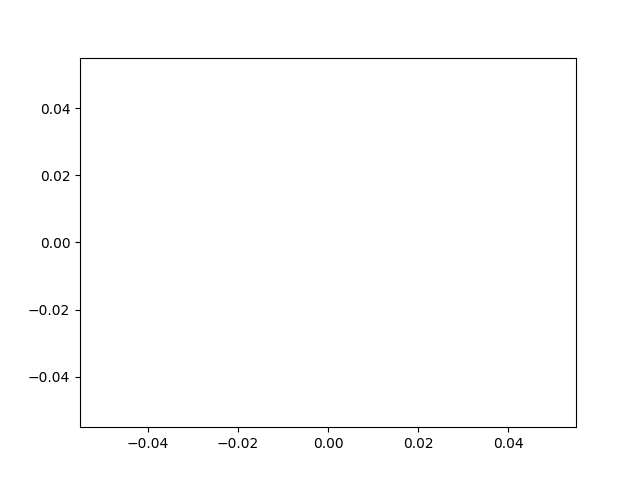

Text(0.5, 0.98, 'By Anchal Debnath EE21B017')

In [5]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'b')
def init():
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,
def mod(x):
    y=x-int(x)
    return y
def update(frame):
    if frame>=0 and frame<1:
        xd,yd=morph(xs,ys,xt,yt,mod(frame))
    if frame>=1 and frame<2:
        xd,yd=morph(xp,yp,xs,ys,mod(frame))
    if frame>=2 and frame<3:
        xd,yd=morph(xh,yh,xp,yp,mod(frame))
    if frame>=3 and frame<4:
        xd,yd=morph(xhp,yhp,xh,yh,mod(frame))
    if frame>=4 and frame<5:
        xd,yd=morph(xo,yo,xhp,yhp,mod(frame))
    if frame>=5 and frame<6:
        xd,yd=morph(xhp,yhp,xo,yo,mod(frame))
    if frame>=6 and frame<7:
        xd,yd=morph(xh,yh,xhp,yhp,mod(frame))
    if frame>=7 and frame<8:
        xd,yd=morph(xp,yp,xh,yh,mod(frame))
    if frame>=8 and frame<9:
        xd,yd=morph(xs,ys,xp,yp,mod(frame))
    if frame>=9 and frame<10:
        xd,yd=morph(xt,yt,xs,ys,mod(frame))
    ln.set_data(xd,yd)
    return ln,
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 2000),init_func=init, blit=True, interval=10, repeat=True)
plt.show()
fig.suptitle('By Anchal Debnath EE21B017', fontsize=14)


The update function is defined to update the data in the plot for each frame, using the morph function to morph between different sets of x and y coordinates of shapes. The morph function is not defined in this code snippet, so it is likely defined elsewhere in the code.
The init function is defined to set the limits of the plot and to return the line object (ln) that will be animated.The frames parameter is set to np.linspace(0, 10, 2000), which creates an array of 2000 evenly spaced values between 0 and 10, representing the progression of the animation over time